In [114]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


By looking into data there are nan's present in the data and there are object present in the data

In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [77]:
df = data.Gender.dropna().mode()[0]
df1 = data.Married.dropna().mode()[0]
df2 = data.Dependents.dropna().mode()[0]
df3 =data.Self_Employed.dropna().mode()[0]
df4 = data.Loan_Amount_Term.dropna().mode()[0]
df5 = data.Credit_History.dropna().mode()[0]
df6 = data.LoanAmount.dropna().mean()

In [85]:
New_data = data['Gender'].fillna(df)
New_data_1 = data['Married'].fillna(df1)
New_data_2= data['Dependents'].fillna(df2)
New_data_3 = data['Self_Employed'].fillna(df3)
New_data_4 = data['Loan_Amount_Term'].fillna(df4)
New_data_5 = data['Credit_History'].fillna(df5)
New_data_6 = data['LoanAmount'].fillna(round(df6))

In [86]:
data['Gender'] = New_data
data['Married'] = New_data_1
data['Dependents'] = New_data_2
data['Self_Employed'] = New_data_3
data['Loan_Amount_Term'] = New_data_4
data['Credit_History'] = New_data_5
data['LoanAmount'] = round(New_data_6)

In [87]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
data['Loan_ID'] = LabelEncoder().fit_transform(data['Loan_ID'])
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['Married'] = LabelEncoder().fit_transform(data['Married'])
data['Dependents'] = LabelEncoder().fit_transform(data['Dependents'])
data['Education'] = LabelEncoder().fit_transform(data['Education'])
data['Self_Employed'] = LabelEncoder().fit_transform(data['Self_Employed'])
data['Property_Area'] = LabelEncoder().fit_transform(data['Property_Area'])
data['Loan_Status'] = LabelEncoder().fit_transform(data['Loan_Status'])

In [95]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [96]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.397394,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037503,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


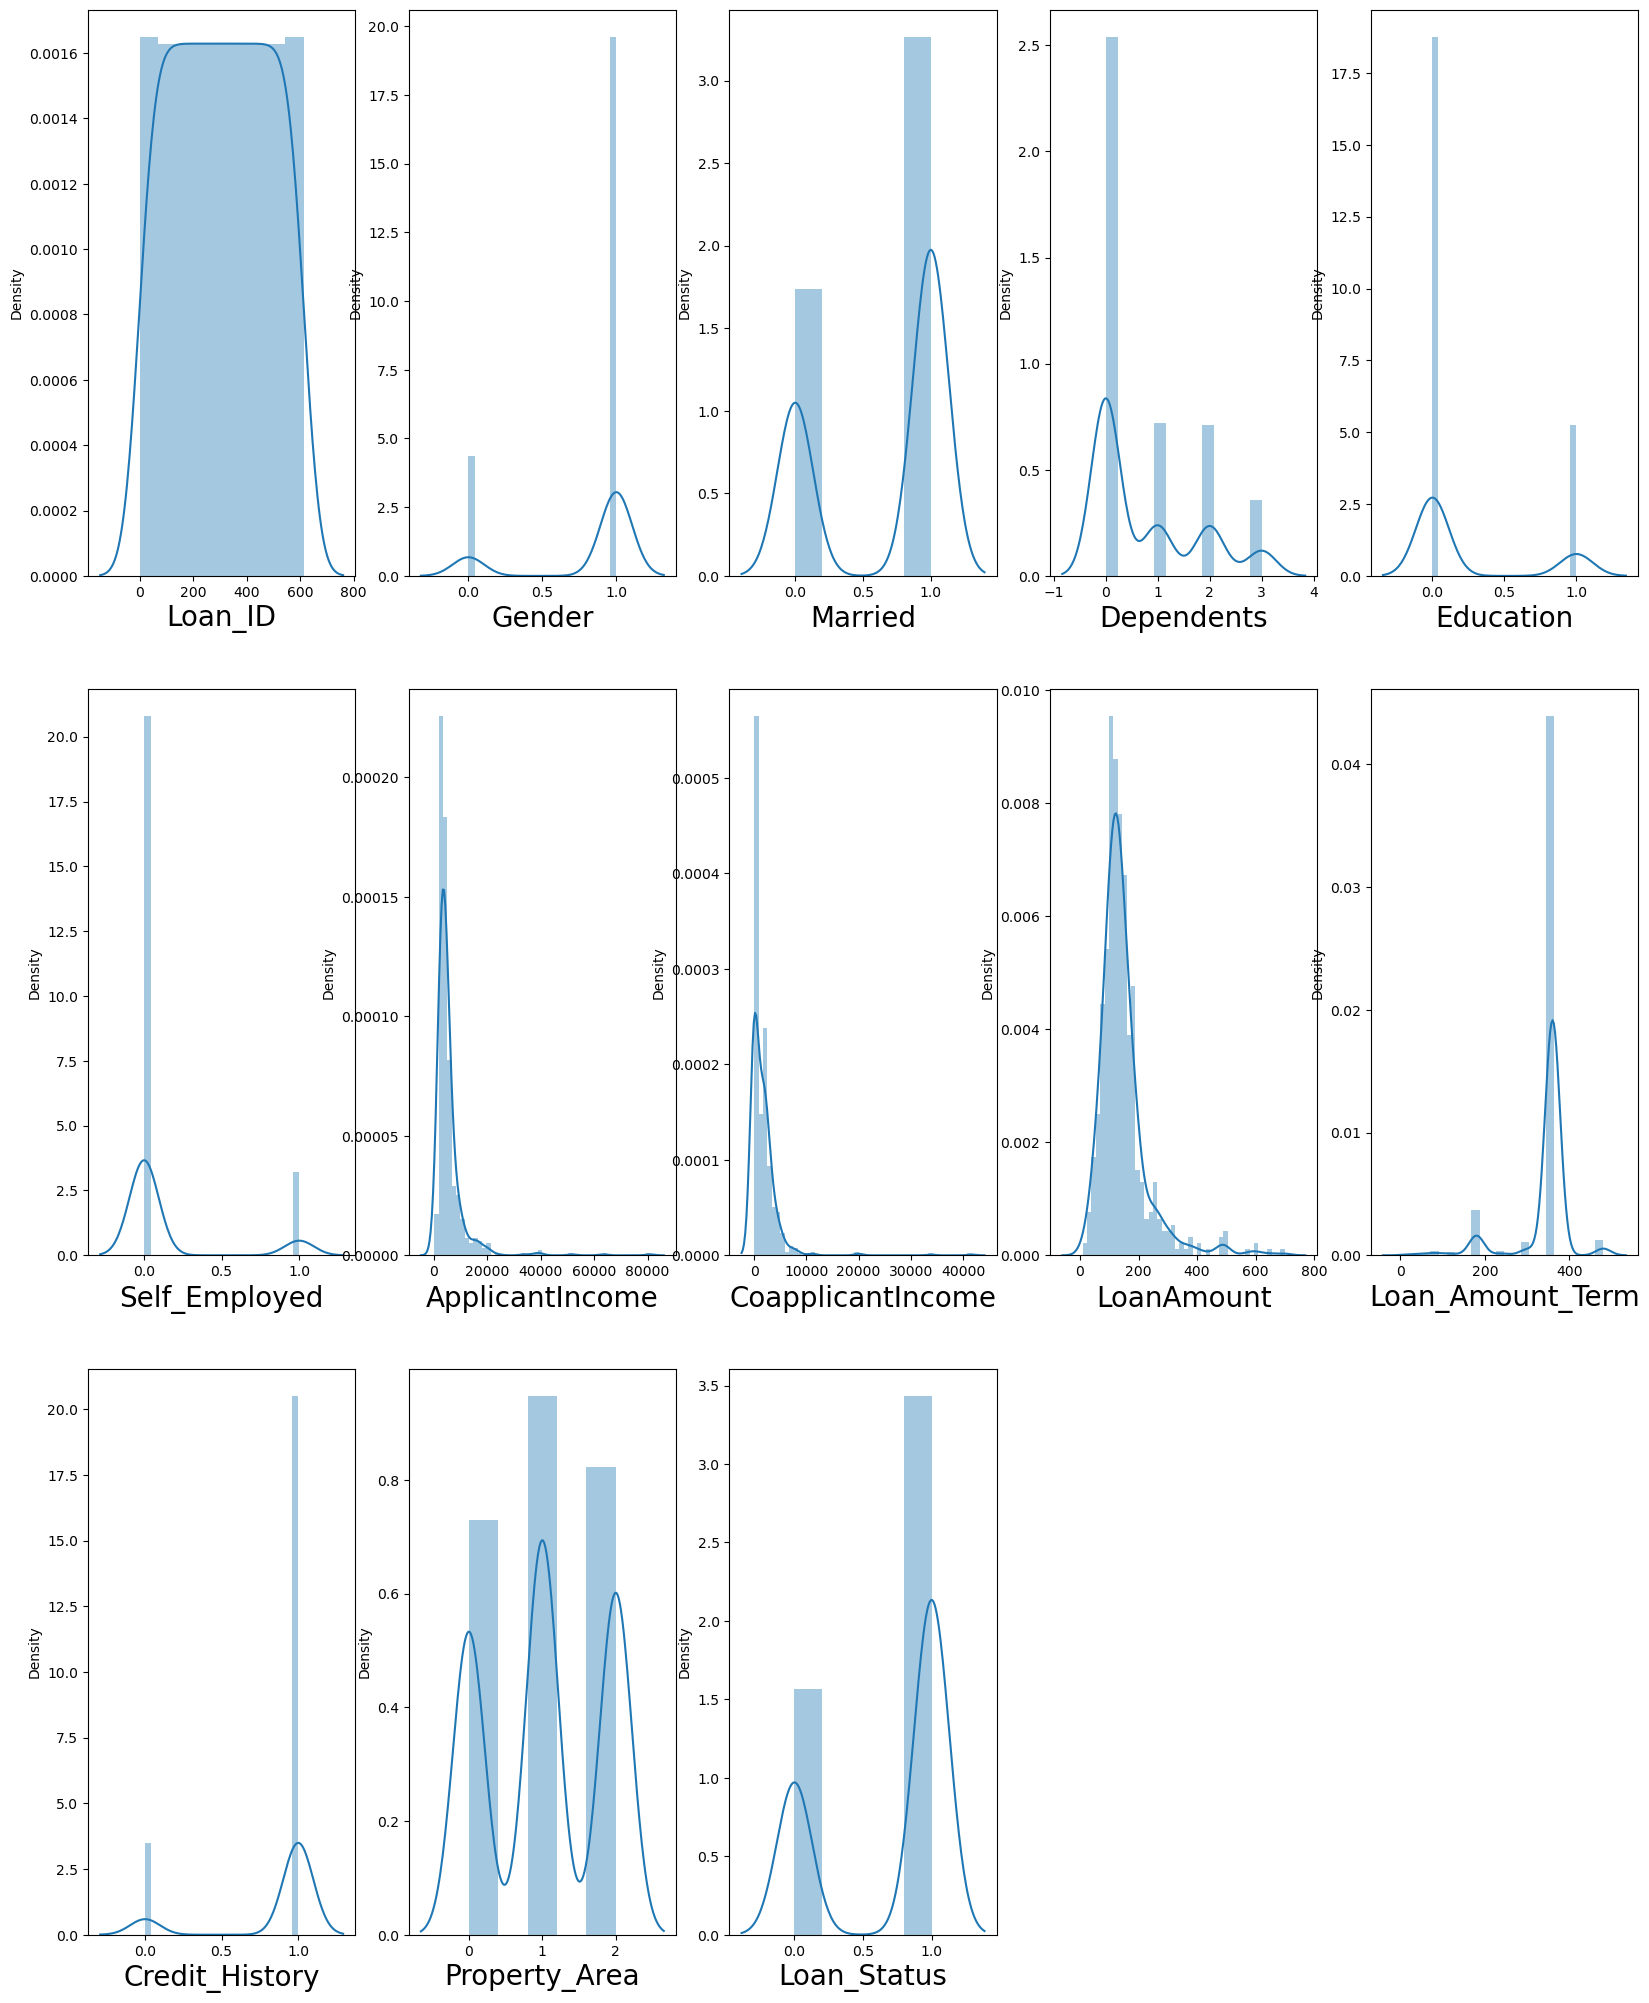

In [100]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data:
    if plotnumber <= 13:
        ax = plt.subplot(3,5,plotnumber)
        sn.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.show()

By looking into the graphs there is skewness in ApplicantIncome,CoapplicantIncome and LoanAmount it should be treated

In [101]:
data.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.727127
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

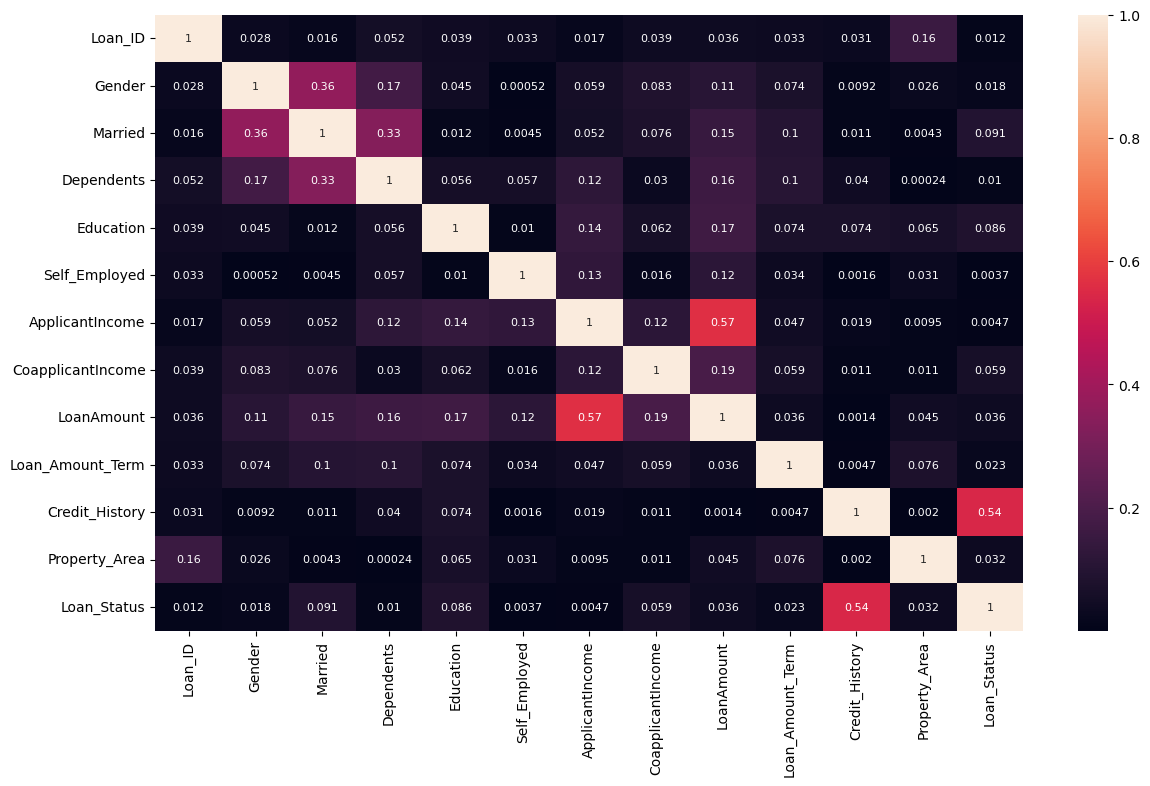

In [104]:
df_corr = data.corr().abs()
plt.figure(figsize = (14,8))
sn.heatmap(df_corr, annot = True, annot_kws = {'size':8})
plt.show()

In [105]:
x = data.drop('Loan_Status',axis = 1)
y = data['Loan_Status']

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [107]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_predict = clf.predict(x_train)
        print('\n ---------- Train Result ----------')
        print(f'Accuracy Score : {accuracy_score(y_train,y_predict)  * 100:.2f}%')
        
        
    elif train == False:
        predict = clf.predict(x_test)
        print('\n ---------- Test Result ----------')
        print(f'Accuracy Score : {accuracy_score(y_test,predict)  * 100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test,predict,digits = 2))

In [108]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [109]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)


 ---------- Train Result ----------
Accuracy Score : 100.00%

 ---------- Test Result ----------
Accuracy Score : 75.32%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.62      0.49      0.55        47
           1       0.79      0.87      0.83       107

    accuracy                           0.75       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154



In [110]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [111]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)


 ---------- Train Result ----------
Accuracy Score : 82.17%

 ---------- Test Result ----------
Accuracy Score : 77.92%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.36      0.50        47
           1       0.77      0.96      0.86       107

    accuracy                           0.78       154
   macro avg       0.79      0.66      0.68       154
weighted avg       0.79      0.78      0.75       154



In [115]:
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [116]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)


 ---------- Train Result ----------
Accuracy Score : 72.61%

 ---------- Test Result ----------
Accuracy Score : 62.34%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.18      0.06      0.09        47
           1       0.68      0.87      0.76       107

    accuracy                           0.62       154
   macro avg       0.43      0.47      0.43       154
weighted avg       0.53      0.62      0.56       154

